# FORESEE - Up-Philic Scalar

### Load Libraries 

In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import sys
#src_path = "/Users/felixkling/Documents/GitHub/FORESEE"
src_path = "/Users/abraham/Documents/GitHub/roshanFORESEE/"
sys.path.append(src_path)

import numpy as np
from src.foresee import Foresee, Utility, Model

from matplotlib import pyplot as plt

## 1. Initialization 


All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [56]:
foresee = Foresee(path=src_path)

## 2. Specifying the Model: Up-philic

The phenomenology of the up-philic Scalar $S$ can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} =  - \frac{1}{2} m_{S}^2\ S^2  - g_u \bar u \ u \ S
\end{equation}

with the dark Higgs mass $m_{S}$ and the coupling parameter $g_u$ as free parameters. For the search for up-philic Scalar boson at forward experiments we need to know i) the *production rate*, ii) the *lifetime* and iii) possibly the *decay branching fractions* of dark Higgs as function of those two parameters. All properties are specified in the `Model` class. We initialize it with the name of the model as argument. 

In [57]:
energy = "13.6"
modelname="UpPhilic"
model = Model(modelname, path="./")

nsample_use = 100

**Production** The up-philic Scalar is mainly produced in eta and kaon decays. For this we need to specify the total branching fraction into the LLP as function of the `coupling` and the `mass`. 

\begin{equation}
    \text{BR}(\eta \to \pi^0  S) = 1.26 \cdot 10^{5} \times [(1-(m_\pi+m_a)^2/m_\eta^2)(1-(m_\pi-m_a)^2/m_\eta^2)]^{1/2}\times  g_u^2 
\end{equation}

\begin{equation}
    \text{BR}(\eta' \to \pi^0 S) = 2.73 \cdot 10^{2} \times [(1-(m_\pi+m_a)^2/m_{\eta'}^2)(1-(m_\pi-m_a)^2/m_{\eta'}^2)]^{1/2}\times  g_u^2 
\end{equation}

\begin{equation}
    \text{BR}(K^+ \to \pi^+ S) = 7.42 \times [(1-(m_\pi+m_a)^2/m_K^2)(1-(m_\pi-m_a)^2/m_K^2)]^{1/2} \times  g_u^2 
\end{equation}


In the following, we model the production using `EPOSLHC`, `SIBYLL`, `QGSJET`, and `Pythia8-Forward`. 

In [58]:
model.add_production_2bodydecay(
    pid0 = "221",
    pid1 = "111",
    br = "1.26e5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.547**2)*(1-(mass-0.135)**2/0.547**2))",
    generator = ['Pythia8-Forward','EPOSLHC', 'SIBYLL', 'QGSJET'],
    energy = energy,
    nsample = nsample_use,
)

model.add_production_2bodydecay(
    pid0 = "331",
    pid1 = "111",
    br = "273. * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.957**2)*(1-(mass-0.135)**2/0.957**2))",
    generator = ['Pythia8-Forward','EPOSLHC', 'SIBYLL'],
    energy = energy,
    nsample = nsample_use,
)

model.add_production_2bodydecay(
    pid0 = "321",
    pid1 = "211",
    br = "7.42 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.49368**2)*(1-(mass-0.135)**2/0.49368**2))",
    generator = ['Pythia8-Forward','EPOSLHC', 'SIBYLL', 'QGSJET'],
    energy = energy,
    nsample = nsample_use,
)

model.add_production_2bodydecay(
    pid0 = "-321",
    pid1 = "-211",
    br = "7.42 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.49368**2)*(1-(mass-0.135)**2/0.49368**2))",
    generator = ['Pythia8-Forward','EPOSLHC', 'SIBYLL', 'QGSJET'],
    energy = energy,
    nsample = nsample_use,
)



**Lifetime:** For most models the lifetime can be written as $\ c\tau(m,g)\  =\  c\tau(m,g_*) \ \cdot\  g_*^2 \ / \ g^{2}$ where $m$ is the mass, $g$ is the coupling and $g_*$ is some reference coupling. In this case, we can provide a table of masses $m$ and lifetimes $c\tau(m,g_*)$ at a reference coupling $g_*$ using `model.set_ctau_1d`. Alternatively, one can also provide a table of masses $m$, couplings $g$ and lifetimes $c\tau(m,g)$ via `model.set_ctau_2d()`. 

In [59]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
    coupling_ref=1
)


**Branching Fractions:** 

In [60]:
branchings = [
    ["gamma"     , "black"        , "solid" , r"$\gamma\gamma$"         , 0.210, 0.50],
    ["pi0_pi0"   , "blue"          , "solid" , r"$\pi^0\pi^0$"          , 0.240, 0.03],
    ["pi+_pi-"   , "red"         , "solid" , r"$\pi^+\pi^-$"           , 0.290, 0.03],
]

finalstates=[
    [22,22], [111,111],[211,-211]
]

model.set_br_1d(
    modes=[channel for channel,_,_,_,_,_ in branchings],
    finalstates=finalstates,
    filenames=["model/br/"+channel+".txt" for channel,_,_,_,_,_ in branchings],
)

## 3. Generate LLP Spectra

After we have specified the model, let us generate the LLP spectra. We first set the model we just created. 

In [61]:
foresee.set_model(model=model)

Let's first look at one benchmark scenario with $m_{S}=350$ MeV and $g_u=10^{-7}$ using the function `foresee.get_llp_spectrum()`. By default, the result are saved in the `model/LLP_spectra` directory. However, here set `save_file=False` since we don't want to save the results but set `do_plot=True` to plot them. 

/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:489: RuntimeWarning: overflow encountered in exp
  if (theta < 0.05/ltas): probability = 1.- np.exp(- ltas/dbarz)
/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:678: RuntimeWarning: invalid value encountered in multiply
  w_decays = np.array([self.get_decay_prob(pid0, p_mother)*w_mother for w_mother, p_mother in zip(weights_mother,momenta_mother)])


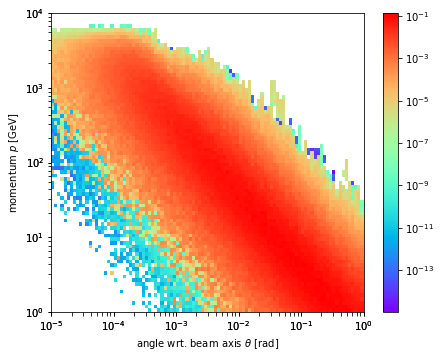

In [8]:
plt = foresee.get_llp_spectrum(mass=0.35, coupling=1e-7, do_plot=True, save_file=False)
plt.show()

We can now produce a set of LLP spectra for various masses  (chosen to be equally spaced in log(mass)) and unit coupling and save them.  

In [75]:
# masses = [   
#     0.01  , 0.0126, 0.0158, 0.02  , 0.0251, 
#     0.0316, 0.0398, 0.0501, 0.0631, 0.0794, 
#     0.1   , 0.1122, 0.1259, 0.1413, 0.1585, 
#     0.1778, 0.1995, 0.2239, 0.2512, 0.269 , 
#     0.270 , 0.271 , 0.275 , 0.28  , 0.29  , 
#     0.3   , 0.3162, 0.35  , 0.3981, 0.41  , 
#     0.42  , 0.4467, 0.5012, 0.5623, 0.631 ,
#     0.7079, 0.7943, 0.81  , 0.82  , 0.8913, 
#     1.    
# ]

# masses = [   
#     0.01  , 0.0126, 0.0158, 0.02  , 0.0251, 
#     0.0316, 0.0398, 0.0501, 0.0631, 0.0794, 
#     0.1   , 0.1122, 0.1259, 0.1413, 0.1585, 
#     0.1778, 0.1995, 0.2239, 0.2512, 0.269 , 
#     0.270 , 0.271 , 0.275 , 0.28  , 0.29  , 
#     0.3   , 0.3162, 0.35  , 0.3981, 0.41  , 
#     0.42  , 0.4467, 0.5012, 0.5623, 0.631 ,
#     0.7079, 0.7943, 0.81  , 0.82    
# ]

# Can't go higher than eta' mass

# Sampling harder near 2 m_pi mas (0.17,0.19) GeV

masses1=np.logspace(-2,-1,10+1)
masses2_list=np.logspace(-1,0,10+1)
masses2=masses2_list[1:2]
masses4=masses2_list[4:-1]
masses3=np.logspace(-0.8,-0.7,21)


masses = np.concatenate((masses1,masses2,masses3,masses4))


print (masses[35])
print (masses[36])

print (len(masses))



# for mass in masses:
#     foresee.get_llp_spectrum(mass=mass,coupling=1)


0.3981071705534973
0.5011872336272724
39


We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

Text(0.5, 1.0, '$\\theta < 0.2$ mrad and E $> 1$ TeV')

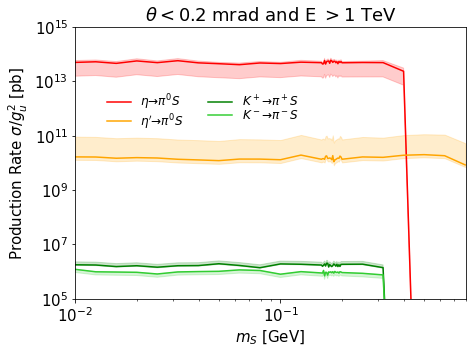

In [63]:
productions=[
     {"channels": ["221"], "color": "red", "label": r"$\eta \to \pi^0 S$", "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward']},
     {"channels": ["331"], "color": "orange", "label": r"$\eta' \to \pi^0 S$", "generators": ['EPOSLHC', 'SIBYLL', 'Pythia8-Forward']},
     {"channels": ["321"], "color": "green", "label": r"$K^+ \to \pi^+ S$", "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward']},
     {"channels": ["-321"], "color": "limegreen", "label": r"$K^- \to \pi^- S$", "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward']},

]

plot=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>3",  
    xlims=[0.01,0.8],
    ylims=[1e5,1e15],
    xlabel=r"$m_S$ [GeV]",
    ylabel=r"Production Rate $\sigma/g_u^2$ [pb]",
    legendloc=(0.6,0.8),
    fs_label=12,
    ncol=2,
)

plot.title(r"$\theta < 0.2$ mrad and E $> 1$ TeV")
#plot.savefig("figures/"+modelname+"_production_channels_E1000.pdf")


## 4. Count Eventrate in Detector

Before counting the number of decays within the detector volume, let us specify the detector geometry. Here we use the default for 2022+2023 data. 

In [22]:
distance, selection, length, luminosity, channels = 476, "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", 1.5, 60, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

Let us look for one mass $m_{S}=350$ MeV and $g_u=1\cdot 10^{-7}$ at how many particle decay inside the decay volume. The list `setups` defines three seups, with corresponding generators (for piopns and eta) and pT cuts (for Brem) specified in `modes`. 

In [23]:
setups = ["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"]
modes = {'221': ["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"], 
         '331':["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"], 
         '321':["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"], 
         '-321':["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"],}  

# setups = ['QGSJET']
# modes = {#'221': ['QGSJET'], 
#          '331':['QGSJET'], 
#          #'321':['QGSJET'], 
#          #'-321':['QGSJET'],
#         }   
         
output = foresee.get_events(mass=0.35, energy=energy, couplings=[1e-7], modes=modes)
coups, ctaus, nsigs, momenta, weights = output
for coup,ctau,nsig in zip(coups, ctaus, nsigs):
    for i in range(len(nsig)): 
        print ("coupling =", '{:5.3e}'.format(coup), setups[i], ": nsignal =", '{:5.3e}'.format(nsig[i]))

coupling = 1.000e-07 Pythia8-Forward : nsignal = 1.424e-02
coupling = 1.000e-07 EPOSLHC : nsignal = 2.570e-02
coupling = 1.000e-07 QGSJET : nsignal = 2.875e-03
coupling = 1.000e-07 SIBYLL : nsignal = 5.624e-03


The previous function also outputs the energy distribution of the dark photons which decay inside the detector. Let's have a look at them.

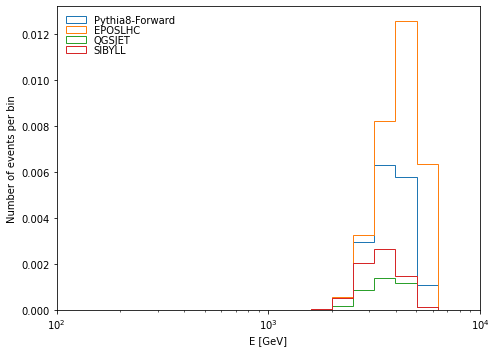

In [10]:
# fig = plt.figure(figsize=(7,5))
# ax = plt.subplot(1,1,1)
# for coup,momentum,weight in zip(coups,momenta,weights):
#     if sum(weight)<10**-5 : continue
#     ax.hist([p.e for p in momentum], weights=weight, bins=np.logspace(2,4, 20), histtype='step', label=r"$g_u=$"+str(coup)) 
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_ylim(10**-7,10**5) 
#     ax.set_xlabel("E(S) [GeV]") 
#     ax.set_ylabel("Number of Events per bin") 
#     ax.legend(frameon=False, labelspacing=0)
# plt.tight_layout()
# plt.show()


fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
for coup,momentum,weight in zip(coups,momenta,weights):
    for w,label in zip(np.array(weight).T, setups):
        ax.hist([p.e for p in momentum], weights=w, bins=np.logspace(2,4, 20+1), histtype='step', label=label) 
    ax.set_xscale("log")
    ax.set_xlim(1e2,1e4) 
    ax.set_xlabel("E [GeV]") 
    ax.set_ylabel("Number of events per bin") 
    ax.legend(frameon=False, labelspacing=0, loc='upper left')
plt.tight_layout()

plt.show()

## 5. Parameter Scan

To get a sensitivity curve, we need to perform a paramerer scan loop over different masses and use the previously introduced funtion `get_events`. The results will be written into a `.npy` file that we can store and plot later. Note that there are multiple files for different generators (this might be changed in the future). 

In [80]:
#specify setup - neutral decays
luminosity, distance, length = 60 , 476, 3.5
setup, selection, channels = "neutral", "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", ["gamma", "pi0_pi0"]
foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, 
    luminosity=luminosity)

#define setups and modes
setups = ['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET']
modes = {'221': ['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '331':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '321':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '-321':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'],} 

#get reach  
list_nevents = {label:[] for label in setups}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, 
        couplings = np.logspace(-8,3,101),modes=modes)
    for i,label in enumerate(setups): list_nevents[label].append(nevents.T[i])  
        
#save results
for label in setups: 
    np.save("model/results/"+energy+"TeV_"+setup+"_"+label+"_oldmasses.npy",[masses,couplings,list_nevents[label]])

In [81]:
#specify setup - charged decays
luminosity, distance, length = 60 , 476, 1.5
setup, selection, channels = "charged", "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", ["pi+_pi-"]
foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, 
    luminosity=luminosity)

#define setups and modes
setups = ['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET']
modes = {'221': ['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '331':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '321':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'], 
         '-321':['Pythia8-Forward', 'EPOSLHC', 'SIBYLL', 'QGSJET'],} 

#get reach  
list_nevents = {label:[] for label in setups}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, 
        couplings = np.logspace(-8,3,101),modes=modes)
    for i,label in enumerate(setups): list_nevents[label].append(nevents.T[i])  
        
#save results
for label in setups: 
    np.save("model/results/"+energy+"TeV_"+setup+"_"+label+"_oldmasses.npy",[masses,couplings,list_nevents[label]])

Combined

In [82]:
# for label in setups: 

#     masses, coups, nsig_neutral = np.load("model/results/"+energy+"TeV_neutral_"+label+".npy", allow_pickle=True)
#     masses, coups, nsig_charged = np.load("model/results/"+energy+"TeV_charged_"+label+".npy", allow_pickle=True)

#     nsig_combined = np.array(nsig_neutral) + np.array(nsig_charged)
#     np.save("model/results/"+energy+"TeV_combined_"+label+".npy",[masses, coups, nsig_combined])   
    
    
for label in setups: 

    masses, coups, nsig_neutral = np.load("model/results/"+energy+"TeV_neutral_"+label+"_oldmasses.npy", allow_pickle=True)
    masses, coups, nsig_charged = np.load("model/results/"+energy+"TeV_charged_"+label+"_oldmasses.npy", allow_pickle=True)

    nsig_combined = np.array(nsig_neutral) + np.array(nsig_charged)
    np.save("model/results/"+energy+"TeV_combined_"+label+"_oldmasses.npy",[masses, coups, nsig_combined]) 

## 6. Plot the Results

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [83]:
# setups = [ 
#     ["13.6TeV_combined_EPOSLHC.npy",  "EPOSLHC"    , "sienna"        ,  "solid"  , 0., 3],
#     ["13.6TeV_combined_SIBYLL.npy" ,  "SYBILL"  , "tomato"    ,  "dotted"  , 0., 3],
#     ["13.6TeV_combined_QGSJET.npy" ,"QGSJET", "maroon"     ,  "dashed"  , 0., 3],
#     ["13.6TeV_combined_Pythia8-Forward.npy" ,"Pythia8-Forward", "rosybrown"     ,  "dashdot"  , 0., 3],    

# ]

setups = [ 
    ["13.6TeV_combined_EPOSLHC_oldmasses.npy",  "EPOSLHC"    , "sienna"        ,  "solid"  , 0., 3],
    ["13.6TeV_combined_SIBYLL_oldmasses.npy" ,  "SYBILL"  , "tomato"    ,  "dotted"  , 0., 3],
    ["13.6TeV_combined_QGSJET_oldmasses.npy" ,"QGSJET", "maroon"     ,  "dashed"  , 0., 3],
    ["13.6TeV_combined_Pythia8-Forward_oldmasses.npy" ,"Pythia8-Forward", "rosybrown"     ,  "dashdot"  , 0., 3],    

]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation)

In [84]:
bounds = [ 
    ["bounds_BBN.txt"       , "BBN"    , 0.260, 5.0*10**-8, 90  ],
    ["bounds_MAMI.txt"      , "MAMI"   , 0.210, 2.5*10**-3 , 0  ],
    ["bounds_CHARM.txt"     , "CHARM"  , 0.200, 1.5*10**-5 , 0  ],
    ["bounds_CHARM2.txt"    , None     , 0.   , 0.         , 0  ],
    ["bounds_E137.txt"      , "E137"   , 0.215, 2.1*10**-4 , 0 ],
    ["bounds_SN1987.txt"    , "SN1987" , 0.2  , 1.0*10**-8 , 0  ],
    ["bounds_KLOE.txt"      , "KLOE"   , 0.358, 3.4*10**-4 , 90 ],
    ["bounds_BES3.txt"      , "BES3"   , 0.410, 3.0*10**-3 , 0  ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [85]:
projections = [
    ["limits_SHiP.txt",       "teal",         "SHiP"    , 0.410, 1.0*10**-8, 0  ],
    ["limits_REDTOP.txt",     "dodgerblue",   "REDTOP"  , 0.410, 5.0*10**-6, 0  ],
]

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

In [79]:
masses = [   
    0.01  , 0.0126, 0.0158, 0.02  , 0.0251, 
    0.0316, 0.0398, 0.0501, 0.0631, 0.0794, 
    0.1   , 0.1122, 0.1259, 0.1413, 0.1585, 
    0.1778, 0.1995, 0.2239, 0.2512, 0.269 , 
    0.270 , 0.271 , 0.275 , 0.28  , 0.29  , 
    0.3   , 0.3162, 0.35  , 0.3981, 0.41  , 
    0.42  , 0.4467, 0.5012, 0.5623, 0.631 ,
    0.7079, 0.7943, 0.81  , 0.82    
]




/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:597: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def boostlist(arr_particle, arr_boost):


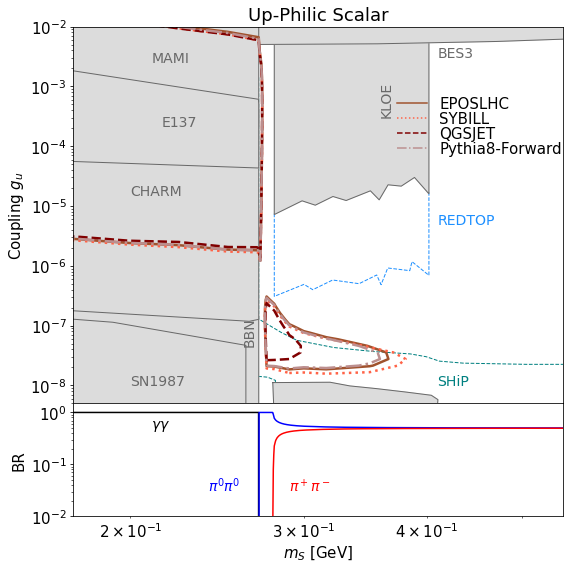

In [89]:
plot, ax1, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    branchings=branchings,
    title="Up-Philic Scalar", 
    linewidths=2.5,    
    xlims=[0.175,0.55], 
    ylims=[5e-9,10**-2],    
#     xlims=[0.099,1.01], 
#     ylims=[10**-10,10**-2],
#     xlims=[0.099,0.5], 
#     ylims=[10**-10,10**-2],    
    xlabel=r"$m_S$ [GeV]", 
    ylabel=r"Coupling $g_u$",
    legendloc=(1.025,0.85),
    figsize=(8,8),
)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("figures/"+modelname+".pdf")
plot.show()